In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors

%matplotlib inline
import seaborn as sns
sns.set_style("white")
import plotly
import plotly.graph_objs as go

import webcolors
from colorharmonies import Color, complementaryColor, triadicColor, splitComplementaryColor, tetradicColor, analogousColor, monochromaticColor

import cv2

from sklearn.cluster import KMeans
from sklearn.metrics import balanced_accuracy_score
from sklearn.neighbors import NearestNeighbors

Let's explore the photo of the interior

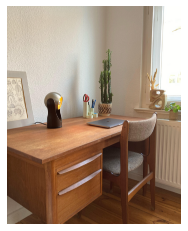

In [2]:
interior_photo_1 = cv2.imread("images/interior_desk1.jpg")
interior_photo_1 = cv2.cvtColor(interior_photo_1, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(interior_photo_1)

In [3]:
def show_photo(import_photo):
    plt.axis('off')
    plt.imshow(interior_photo_1)

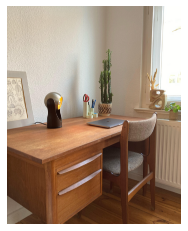

In [4]:
show_photo(show_photo)

In [5]:
interior_photo_1

array([[[198, 195, 176],
        [185, 182, 163],
        [192, 187, 168],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       [[200, 197, 178],
        [187, 184, 165],
        [190, 185, 166],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       [[199, 196, 177],
        [189, 186, 167],
        [189, 184, 165],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       ...,

       [[147, 134, 115],
        [147, 134, 115],
        [144, 131, 112],
        ...,
        [151, 101,  50],
        [152, 102,  51],
        [150, 100,  49]],

       [[148, 135, 116],
        [148, 135, 116],
        [145, 132, 113],
        ...,
        [153, 103,  52],
        [156, 106,  55],
        [154, 104,  53]],

       [[150, 137, 118],
        [149, 136, 117],
        [146, 133, 114],
        ...,
        [154, 104,  53],
        [152, 102,  51],
        [148,  98,  47]]

In [6]:
def prepare_dataframe(show_photo):
    interior_photo_2d = interior_photo_1.reshape((-1,3))
    interior_photo_1_df = pd.DataFrame(data=interior_photo_2d, columns=["Red", "Green", "Blue"])
    return interior_photo_1_df[["Red", "Green", "Blue"]]

In [7]:
prepare_dataframe(show_photo)

,Red,Green,Blue
0,198,195,176
1,185,182,163
2,192,187,168
3,199,194,175
4,197,190,172
...,...,...,...
11430715,149,99,48
11430716,151,101,50
11430717,154,104,53
11430718,152,102,51


In [8]:
interior_photo_2d = interior_photo_1.reshape((-1,3))

In [9]:
interior_photo_2d

array([[198, 195, 176],
       [185, 182, 163],
       [192, 187, 168],
       ...,
       [154, 104,  53],
       [152, 102,  51],
       [148,  98,  47]], dtype=uint8)

Kmeans clustering with OpenCV to see how the clusters look like in the photo itself

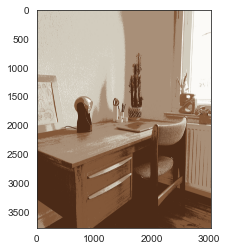

In [10]:
pixels = interior_photo_1.reshape((-1,3))

# convert to np.float32
pixels = np.float32(pixels)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5 
ret,label,center=cv2.kmeans(pixels,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((interior_photo_1.shape))

plt.imshow(res)
plt.show()

Determining the optimal amount of clusters with the elbow method

In [15]:
interior_photo_1_df = pd.DataFrame(data=interior_photo_2d, columns=["Red", "Green", "Blue"])

In [16]:
#shows that 3 clusters seems is the most optimal amount
#to account for extra shadows etc, let's go for 5 to start

def plot_elbow(X):
    inertias = {}   
    for k in range(1,15):
        cl = KMeans(n_clusters=k).fit(X)
        inertias[k] = cl.inertia_
    plt.figure(figsize=(10,6))
    sns.lineplot(x=list(inertias.keys()),
                 y=list(inertias.values()));
    plt.title("Optimal number of clusters");

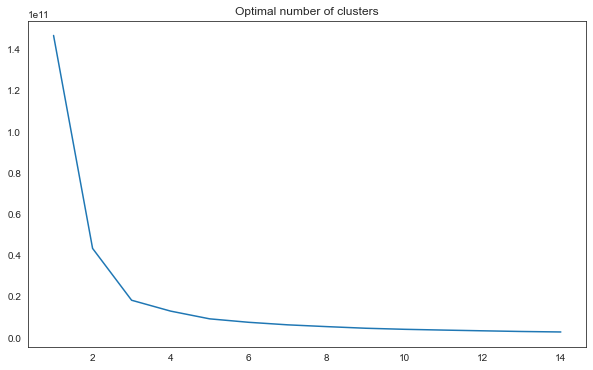

In [17]:
plot_elbow(interior_photo_1_df)

Using Kmeans (scikit learn) for clustering

In [18]:
interior_photo_1_df.head()

,Red,Green,Blue
0,198,195,176
1,185,182,163
2,192,187,168
3,199,194,175
4,197,190,172


In [19]:
len(interior_photo_1_df)

11430720

In [21]:
#run model and explore amount of clusters

X = interior_photo_1_df[["Red", "Green", "Blue"]]
clusters = KMeans(n_clusters=5)
clusters.fit(X)

KMeans(n_clusters=5)

In [23]:
X.head() #same

,Red,Green,Blue
0,198,195,176
1,185,182,163
2,192,187,168
3,199,194,175
4,197,190,172


In [24]:
clusters.predict(X)

array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

In [25]:
#add the cluster to the dataframe

X_clusters = X.assign(cluster=clusters.predict(X))

In [26]:
X_clusters.head()

,Red,Green,Blue,cluster
0,198,195,176,3
1,185,182,163,3
2,192,187,168,3
3,199,194,175,3
4,197,190,172,3


In [27]:
#double check to see that there are 5 clusters

X_clusters["cluster"].nunique()

5

Plot the clusters in 3d

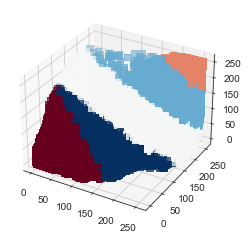

Inertia: 9068540179.046003


In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = np.array(X_clusters["Red"])
g = np.array(X_clusters["Green"])
b = np.array(X_clusters["Blue"])

ax.scatter(r,g,b, marker="s", c=X_clusters["cluster"], s=40, cmap="RdBu")

plt.show()

print(f"Inertia: {clusters.inertia_}")

centroids

In [35]:
# 5 clusters, 5 lists of centroids

centroids = clusters.cluster_centers_
print(centroids)

[[167.60767336 142.60916    119.41845181]
 [ 74.44115394  42.45584171  23.7327825 ]
 [130.35278055  87.33323074  55.51191419]
 [209.59231903 202.48541543 189.78893696]
 [249.22562097 248.97772107 245.03858835]]


In [36]:
percent=[]
for i in range(len(centroids)):
    labels = list(labels)
    j=labels.count(i)
    j=j/(len(labels))
    percent.append(j)
    #return percent
print(percent)

[0.2945126816158562, 0.21717022199826433, 0.17364706685143194, 0.25052148945998154, 0.064148540074466]


In [30]:
# create labels

X = interior_photo_1_df[["Red", "Green", "Blue"]]
clusters = KMeans(n_clusters=5)
clusters.fit(X)
labels = clusters.labels_
labels = list(labels)
print(labels)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
labels = list(labels)

In [32]:
list(clusters.labels_) == list(labels)

True

In [33]:
list(clusters.labels_) != list(labels)

False

In [34]:
labels

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


get the percentages for the piechart

In [37]:
percent = []
for i in range(len(centroids)):
    labels = list(labels)
    j = labels.count(i)
    j = j / (len(labels))
    percent.append(j)
print(percent)

[0.2945126816158562, 0.21717022199826433, 0.17364706685143194, 0.25052148945998154, 0.064148540074466]


HEX codes

Error: "ValueError: RGBA values should be within 0-1 range", thus need to divide by 255 to transform into RGBA color codes 

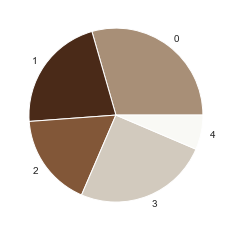

In [38]:
plt.pie(percent,colors=np.array(centroids/255),labels=np.arange(len(centroids)))
plt.show()

convert RGB values into HEX

In [41]:
#ValueError: RGBA values should be within 0-1 range

#[rgb2hex((centroids)[i,:]) for i in range(len(centroids))]

In [40]:
#ValueError: RGBA values should be within 0-1 range
#dividing the centroids/255 (RGB values)
#double checking https://www.rapidtables.com/convert/color/hex-to-rgb.html

[rgb2hex((centroids/255)[i,:]) for i in range(len(centroids/255))]

#hex_code = [rgb2hex((centroids/255)[i,:]) for i in range(len(centroids/255))]




['#a88f77', '#4a2a18', '#825738', '#d2cabe', '#f9f9f5']

Checking and testing webcolors

In [42]:
# Webcolors only has a limited amount of colors available. Error rate high

webcolors.hex_to_name(u'#4F86F7')

ValueError: '#4F86F7' has no defined color name in css3

In [49]:
#https://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green-with-python
#df_RGB

requested_colour = (210, 202, 190) #from centroids
actual_name, closest_name = get_colour_name(requested_colour)

def closest_colour(requested_colour): #input RGB tuple
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items(): #hex to rgb
        r_c, g_c, b_c = webcolors.hex_to_rgb(key) #check if this is just converting or taking rom list
        rd = (r_c - requested_colour[0]) ** 2 #kind of KNN but manually
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name #key rgb, value name
    return min_colours[min(min_colours.keys())] #find minimum distance to color

def get_colour_name(requested_colour):
    rgb_to_hex = #rgb2hex(requested_colour/255)
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour) #input RGB and check list for name
    except ValueError:
        closest_name = closest_colour(requested_colour) #name with minimum distance
        actual_name = None
    return actual_name, closest_name

print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

In [45]:
abc = (33, 171, 205)

webcolors.rgb_to_hex(abc)

'#21abcd'

In [46]:
#test
webcolors.hex_to_rgb("#21ABCD")

IntegerRGB(red=33, green=171, blue=205)

Converted df_hex (see all below) to dict_items like webcolors

In [50]:
#hex_dict = [tuple(hex) for hex in df_hex.to_dict()]

hex_dict = dict(zip(df_hex["hex"], df_hex["name"]))

In [51]:
type(hex_dict.items())

In [52]:
print(hex_dict.items())

convert color

In [54]:
def closest_colour2(requested_colour): #input RGB tuple. type of webcolors is dict_items()
    min_colours = {}
    for key, name in hex_dict.items(): #hex to rgb
        r, g, b = webcolors.hex_to_rgb(key) #works for any transformation
        red = (r - requested_colour[0]) ** 2 #kind of KNN but manually
        green = (g - requested_colour[1]) ** 2
        blue = (b - requested_colour[2]) ** 2
        min_colours[(red + green + blue)] = name #key rgb, value name
    return min_colours[min(min_colours.keys())] #find minimum distance to color

def get_colour_name2(requested_colour):
    rgb_to_hex = webcolors.rgb_to_hex(requested_colour)
    try:
        closest_name = actual_name = hex_dict[rgb_to_hex] #triyng to find the acutal name in list
    except KeyError:
        closest_name = closest_colour2(requested_colour) #name with minimum distance
        actual_name = None
    return actual_name, closest_name

requested_colour = (33, 171, 205) #from centroids
actual_name, closest_name = get_colour_name2(requested_colour)

print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

In [55]:
requested_colour2 = (132, 222, 2)

In [57]:
actual_name, closest_name = get_colour_name2(requested_colour2)

print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

In [59]:
closest_name

In [60]:
hex_dict["#5D8AA8"]

In [62]:
def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = hex_dict(requested_colour) #triyng to find the acutal name in list
    except ValueError:
        closest_name = closest_colour(requested_colour) #name with minimum distance
        actual_name = None
    return actual_name, closest_name

print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

In [63]:
print(webcolors.css3_hex_to_names.items())

dict_items([('#f0f8ff', 'aliceblue'), ('#faebd7', 'antiquewhite'), ('#00ffff', 'cyan'), ('#7fffd4', 'aquamarine'), ('#f0ffff', 'azure'), ('#f5f5dc', 'beige'), ('#ffe4c4', 'bisque'), ('#000000', 'black'), ('#ffebcd', 'blanchedalmond'), ('#0000ff', 'blue'), ('#8a2be2', 'blueviolet'), ('#a52a2a', 'brown'), ('#deb887', 'burlywood'), ('#5f9ea0', 'cadetblue'), ('#7fff00', 'chartreuse'), ('#d2691e', 'chocolate'), ('#ff7f50', 'coral'), ('#6495ed', 'cornflowerblue'), ('#fff8dc', 'cornsilk'), ('#dc143c', 'crimson'), ('#00008b', 'darkblue'), ('#008b8b', 'darkcyan'), ('#b8860b', 'darkgoldenrod'), ('#a9a9a9', 'darkgrey'), ('#006400', 'darkgreen'), ('#bdb76b', 'darkkhaki'), ('#8b008b', 'darkmagenta'), ('#556b2f', 'darkolivegreen'), ('#ff8c00', 'darkorange'), ('#9932cc', 'darkorchid'), ('#8b0000', 'darkred'), ('#e9967a', 'darksalmon'), ('#8fbc8f', 'darkseagreen'), ('#483d8b', 'darkslateblue'), ('#2f4f4f', 'darkslategrey'), ('#00ced1', 'darkturquoise'), ('#9400d3', 'darkviolet'), ('#ff1493', 'deeppink

In [64]:
type(webcolors.css3_hex_to_names.items())

dict_items

check matplotlib colors

In [65]:
type(matplotlib.colors.cnames.items())

dict_items

In [66]:
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


color clustering

In [68]:
df = pd.read_csv("data/wikipedia_color_names.csv")

In [69]:
df_RGB = df[["name", "red", "green", "blue"]]

In [70]:
#check the wikipedia CSV with about 1300 color names:
#https://github.com/angristan/palette/blob/master/dataset/wikipedia_color_names.csv

df22 = pd.read_csv("data/wikipedia_color_names.csv")

In [71]:
df22.head()

,name,hex,red,green,blue,hue,hsl_s,"hsl_l, hsv_s, hsv_v"
0,Absolute zero,#0048BA,0,72,186,217.0,100.0,37.0
1,Acid green,#B0BF1A,176,191,26,65.0,76.0,43.0
2,Aero,#7CB9E8,124,185,232,206.0,70.0,70.0
3,Aero blue,#C9FFE5,201,255,229,151.0,100.0,89.0
4,African violet,#B284BE,178,132,190,288.0,31.0,63.0


In [72]:
df22 = df22[["name", "red", "green", "blue"]]

In [73]:
df22.head()

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190


In [74]:
#checking for more clusters

clusters = KMeans(n_clusters=15)
clusters.fit(df22[["red", "green", "blue"]])
labels = clusters.labels_

In [75]:
print(clusters.labels_)

[ 6  5 12 ...  6  9  4]


add clusters to df

In [76]:
#clusters.predict(X)

color_clusters = df22.assign(cluster=clusters.predict(df22[["red", "green", "blue"]]))

In [77]:
color_clusters.head()

,name,red,green,blue,cluster
0,Absolute zero,0,72,186,6
1,Acid green,176,191,26,5
2,Aero,124,185,232,12
3,Aero blue,201,255,229,3
4,African violet,178,132,190,1


In [78]:
color_clusters.loc[color_clusters["cluster"] == 0]

,name,red,green,blue,cluster
20,Amazon,59,122,87,0
33,Ao (English),0,128,0,0
64,Bangladesh green,0,106,78,0
120,Bottle green,0,106,78,0
198,Celadon green,47,132,124,0
...,...,...,...,...,...
1170,Tropical rain forest,0,117,94,0
1194,UFO Green,60,208,112,0
1234,Viridian,64,130,109,0
1245,Vivid malachite,0,204,51,0


In [79]:
color_clusters.loc[color_clusters["cluster"] == 1]

,name,red,green,blue,cluster
4,African violet,178,132,190,1
17,Amaranth pink,241,156,187,1
60,Baker-Miller pink,255,145,175,1
89,Black Shadows,191,175,178,1
127,Bright lavender,191,148,228,1
...,...,...,...,...,...
1197,Ultra pink,255,111,255,1
1215,Vanilla ice,243,143,169,1
1231,Violet (web),238,130,238,1
1269,Wild orchid,212,112,162,1


In [80]:
color_clusters.loc[color_clusters["cluster"] == 2]

,name,red,green,blue,cluster
13,Alloy orange,196,98,16,2
23,Amber (SAE/ECE),255,126,0,2
82,Bittersweet,254,111,94,2
134,Bright Yellow (Crayola),255,170,29,2
140,Bronze,205,127,50,2
...,...,...,...,...,...
1248,Vivid orange peel,255,160,0,2
1252,Vivid red-tangelo,223,97,36,2
1254,Vivid tangelo,240,116,39,2
1256,Vivid vermilion,229,96,36,2


optimal amount of clusters

In [81]:
df33 = df22[["red", "green", "blue"]]

In [82]:
len(df33)

1298

In [83]:
# looks like optimal is like 6 or so, but seems way too little for me for all the amount of colors

def plot_elbow(df33):
    inertias = {}   
    for k in range(1,20):
        cl = KMeans(n_clusters=k).fit(df33)
        inertias[k] = cl.inertia_
    plt.figure(figsize=(20,12))
    sns.lineplot(x=list(inertias.keys()),
                 y=list(inertias.values()));
    plt.title("Optimal number of clusters");

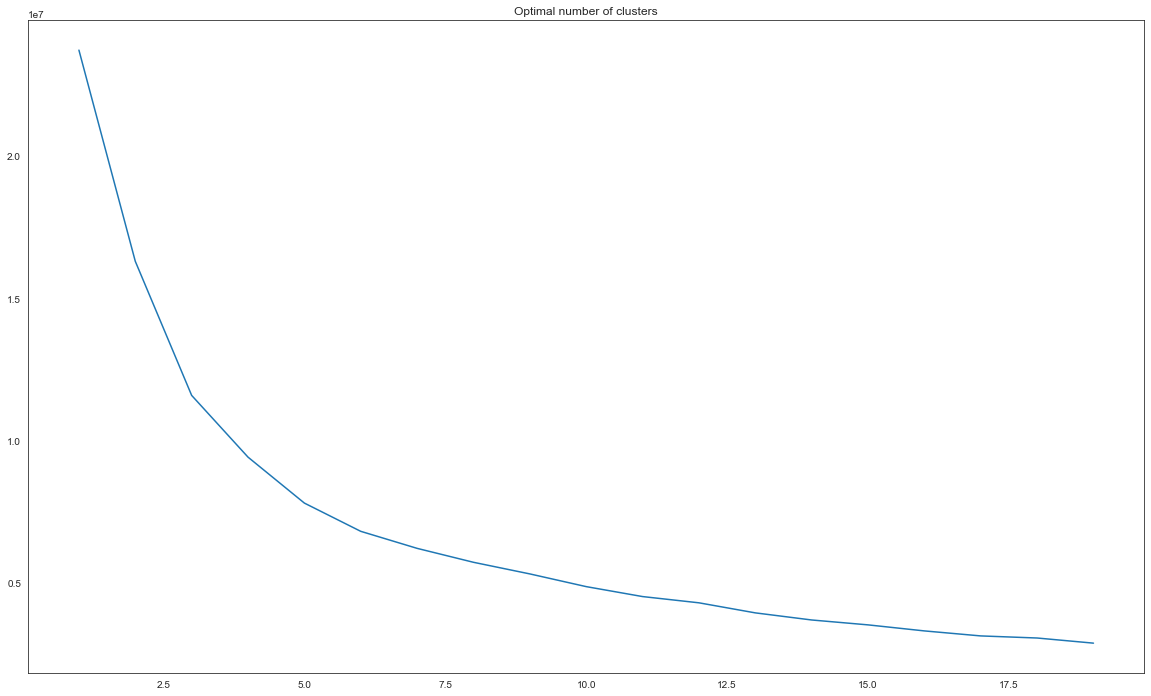

In [84]:
plot_elbow(df33)

Check the list of about 1300 colors. Credit: https://github.com/angristan/palette/blob/master/dataset/wikipedia_color_names.csv

In [85]:
df = pd.read_csv("data/wikipedia_color_names.csv")

In [86]:
df.head()

,name,hex,red,green,blue,hue,hsl_s,"hsl_l, hsv_s, hsv_v"
0,Absolute zero,#0048BA,0,72,186,217.0,100.0,37.0
1,Acid green,#B0BF1A,176,191,26,65.0,76.0,43.0
2,Aero,#7CB9E8,124,185,232,206.0,70.0,70.0
3,Aero blue,#C9FFE5,201,255,229,151.0,100.0,89.0
4,African violet,#B284BE,178,132,190,288.0,31.0,63.0


In [87]:
df_RGB = df[["name", "red", "green", "blue"]]

In [88]:
df_hex = df[["name", "hex"]]

In [89]:
df_hex.head()

,name,hex
0,Absolute zero,#0048BA
1,Acid green,#B0BF1A
2,Aero,#7CB9E8
3,Aero blue,#C9FFE5
4,African violet,#B284BE


checking KNN to match color names

In [90]:
# doesn't work on string included

model_knn = NearestNeighbors(metric="cosine",
                             algorithm="brute",
                             n_jobs=-1)
#model_knn.fit(df_RGB)

checking Fuzzy Wuzzy to match color names

In [91]:
#df_RGB["rgb"] = df_RGB["red"].astype(str) + "" + df_RGB["green"].astype(str) + '' + df_RGB["blue"].astype(str)

In [92]:
#df_RGB.head()

In [93]:
df_RGB_index = df_RGB.copy()

In [94]:
df_RGB_index = df_RGB_index.set_index(["name"])

In [97]:
df_RGB_index = df_RGB_Test["rgb"].to_dict().items()

In [96]:
df_RGB_index

,red,green,blue
name,,,
Absolute zero,0,72,186
Acid green,176,191,26
Aero,124,185,232
Aero blue,201,255,229
African violet,178,132,190
...,...,...,...
Yellow rose,255,240,0
Yellow Sunshine,255,247,0
Zaffre,0,20,168


In [98]:
matches = []

for rgb, name in df_RGB_index:
    find_color = "Alien Armpit"
    #compute ratio and remove case sensitivity
    ratio = fuzz.ratio(find_color.lower())
    
    #add all matches to list with ratio > 60
    if ratio >= 60:
        matches.append((rgb, name, ratio))

ValueError: too many values to unpack (expected 2)

find complementary colors. Source library: https://github.com/baptistemanteau/colorharmonies

In [99]:
from colorharmonies import Color, complementaryColor, triadicColor, splitComplementaryColor, tetradicColor, analogousColor, monochromaticColor


In [100]:
brown1 = Color([130, 87, 55],"","")



In [101]:
complementaryColor(brown1)

[55, 98, 130]

In [102]:
analogousColor(brown1)

[[130, 124, 55], [130, 55, 60]]